In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv

In [2]:
# load the new file
df = read_csv('./data/bitcoin_data.csv', date_parser = True)
df.drop(df.columns[0], axis=1,inplace = True)
len(df)

19433

In [3]:
df = df[df['NewDateTime']>= '2021-01-01'].copy()
len(df)

8171

In [4]:
df.drop(df.head(len(df)%168).index,inplace=True)
len(df)

8064

In [5]:
int(len(df)/8*7)

7056

In [6]:
data_training = df.iloc[0:int(len(df)/8*7),:]
data_test = df.iloc[int(len(df)/8*7):int(len(df)),:]

len(data_training)

7056

In [7]:
training_data = data_training.drop(['NewDateTime'], axis = 1)


training_data.tail()

,close,open,high,low,Volume BTC,returns,log_returns,SOPR,fundingRate,googleTrend
18420,62000.00,62326.59,62367.76,61931.69,1027.41316,0.994760,-0.005254,1.004381,0.0606,66
18421,62094.90,62000.01,62300.27,61851.87,1572.88224,1.001531,0.001529,1.004381,0.0606,66
18422,60810.59,62094.89,62105.63,60501.00,2762.87189,0.979317,-0.020900,1.004381,0.0606,66
18423,60292.24,60810.60,60892.75,59817.55,5971.16010,0.991476,-0.008561,1.004381,0.0606,66
18424,60328.81,60292.25,60607.33,60160.63,1704.03770,1.000607,0.000606,1.004381,0.0606,66


In [8]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.06742516, 0.05602835, 0.0555107 , ..., 0.82172583, 0.52569403,
        0.21176471],
       [0.06233308, 0.0674249 , 0.06302226, ..., 0.82172583, 0.52569403,
        0.21176471],
       [0.05901186, 0.06233254, 0.05880889, ..., 0.82172583, 0.52569403,
        0.21176471],
       ...,
       [0.83884832, 0.87297154, 0.86875961, ..., 0.47298329, 0.44388659,
        0.6       ],
       [0.82507591, 0.83884832, 0.83623677, ..., 0.47298329, 0.44388659,
        0.6       ],
       [0.82604756, 0.82507591, 0.82858336, ..., 0.47298329, 0.44388659,
        0.6       ]])

In [9]:
X_train = []
Y_train = []

In [10]:
training_data.shape

(7056, 10)

In [11]:
for i in range(840, training_data.shape[0],84):
    
    X_train.append(training_data[i-840:i-168])
    Y_train.append(training_data[i-168:i,0])

In [12]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [13]:
X_train.shape

(74, 672, 10)

In [14]:
Y_train.shape

(74, 168)

In [15]:
Y_train.shape[0]

74

In [16]:
Y_train=Y_train.reshape(Y_train.shape[0],168,1)

In [17]:
# Y_train[1,:,0]

In [18]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,RepeatVector,TimeDistributed

In [19]:

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(X_train.shape[1], 10)))
model.add(Dropout(0.4))
model.add(RepeatVector(168))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(TimeDistributed(Dense(50, activation='relu')))
model.add(TimeDistributed(Dense(1)))

# model.add(LSTM(units = 200, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 10)))
# model.add(Dropout(0.1))
# model.add(LSTM(units = 200, return_sequences = True, activation = 'relu'))

# model.add(Dropout(0.1))
# model.add(Dense(units =1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               168800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 168, 200)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 168, 200)          320800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 168, 200)          0         
_________________________________________________________________
time_distributed (TimeDistri (None, 168, 50)           10050     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 168, 1)            5

In [21]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=16, verbose=1, validation_split=0.1)

Train on 66 samples, validate on 8 samples
Epoch 1/15


In [33]:
# import tensorflow as tf
# model = tf.keras.models.load_model('LSTM_168_1216.h5')

In [34]:
model.save("840_168.h5")

In [35]:
# result = model.predict(X_train, batch_size=128, verbose=0)
# for value in result[0,:,0]:
# 	print('%.1f' % value)

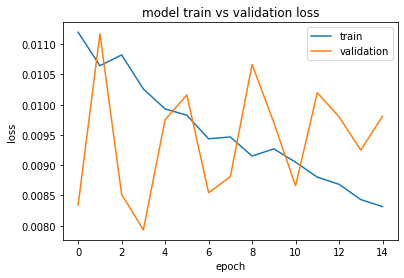

In [67]:
loss = history.history['loss']
epoch = range(len(loss))
# plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [65]:
history.history

{'loss': [0.16677434879452221,
  0.046782901373954355,
  0.034028697384945676,
  0.01646277470636437,
  0.01613742157881612,
  0.014755231928813872,
  0.012037099295917855,
  0.01105900456891557,
  0.011583803591954892,
  0.01114745727923616,
  0.010272325890347303,
  0.010372809779877023,
  0.010109132123413463,
  0.010628432398626013,
  0.010546908944010966]}

In [37]:
# from tensorflow import keras
# regressor = Sequential()
# regressor = keras.models.load_model("LSTM_model_1210.h5")

In [38]:
past_4weeks = data_training.tail(672)
df= past_4weeks.append(data_test, ignore_index = True)
# test.drop(test.tail(len(test)%168).index,inplace=True)
# test = test.drop(['NewDateTime'], axis=1)
df = df.drop(['NewDateTime'], axis = 1)
len(df)

1680

In [39]:
inputs = scaler.transform(df)
inputs

array([[0.32775121, 0.33512006, 0.32599428, ..., 0.40370747, 0.27466037,
        0.43529412],
       [0.31319181, 0.32775095, 0.32137306, ..., 0.40370747, 0.27466037,
        0.43529412],
       [0.32832751, 0.31315089, 0.32320047, ..., 0.4308878 , 0.29356172,
        0.41176471],
       ...,
       [0.56463109, 0.56334671, 0.56711805, ..., 0.47911513, 0.27643237,
        0.09411765],
       [0.55813028, 0.56463109, 0.5609499 , ..., 0.47911513, 0.27643237,
        0.09411765],
       [0.56726229, 0.55813001, 0.56321734, ..., 0.47911513, 0.27643237,
        0.08235294]])

In [40]:
X_test = []
Y_test = []
for i in range(840, inputs.shape[0],24):
    X_test.append(inputs[i-840:i-168])
    Y_test.append(inputs[i-168:i,0])

In [41]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((35, 672, 10), (35, 168))

In [42]:
Y_test=Y_test.reshape(35,168,1)

In [43]:
X_pred = model.predict(X_train)
X_pred.shape

(259, 168, 1)

In [44]:
Y_pred = model.predict(X_test)
Y_pred, Y_test

(array([[[0.2749139 ],
         [0.42656085],
         [0.5328273 ],
         ...,
         [0.7575483 ],
         [0.7575483 ],
         [0.7575483 ]],
 
        [[0.26048192],
         [0.4020332 ],
         [0.50137824],
         ...,
         [0.7128883 ],
         [0.7128883 ],
         [0.7128883 ]],
 
        [[0.27308634],
         [0.42352927],
         [0.5291468 ],
         ...,
         [0.75304   ],
         [0.75304   ],
         [0.75304   ]],
 
        ...,
 
        [[0.23782744],
         [0.3635031 ],
         [0.45176977],
         ...,
         [0.6415706 ],
         [0.6415706 ],
         [0.6415706 ]],
 
        [[0.24257326],
         [0.3716685 ],
         [0.4623408 ],
         ...,
         [0.6570326 ],
         [0.6570326 ],
         [0.6570326 ]],
 
        [[0.25909972],
         [0.39966425],
         [0.49852276],
         ...,
         [0.709942  ],
         [0.709942  ],
         [0.709942  ]]], dtype=float32),
 array([[[0.83551807],
         [0.83117

In [45]:
Y_pred.shape

(35, 168, 1)

In [46]:
scaler.scale_

array([2.65697120e-05, 2.65697120e-05, 2.68145615e-05, 2.66417939e-05,
       2.26040745e-05, 4.70137657e+00, 4.76290973e+00, 1.02247277e+01,
       2.95333727e+00, 1.17647059e-02])

In [47]:
scale = 1/2.65697120e-05
scale

37636.84002295546

In [48]:
# scale.inverse_transform(Y_pred)

In [49]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [50]:
Y_pred.shape

(35, 168, 1)

In [51]:
Y_test[0,0,0]

31446.260019179706

In [52]:
len(Y_pred[1,:,0])

168

In [53]:
Y_pred[1,:,0]

array([ 9803.717, 15131.26 , 18870.293, 21470.52 , 23274.771, 24513.318,
       25352.26 , 25912.156, 26279.484, 26515.963, 26664.662, 26755.342,
       26808.352, 26837.418, 26851.684, 26857.113, 26857.549, 26855.404,
       26852.12 , 26848.547, 26845.146, 26842.133, 26839.588, 26837.506,
       26835.85 , 26834.55 , 26833.564, 26832.81 , 26832.25 , 26831.836,
       26831.535, 26831.322, 26831.17 , 26831.062, 26830.992, 26830.94 ,
       26830.91 , 26830.883, 26830.873, 26830.865, 26830.861, 26830.861,
       26830.857, 26830.857, 26830.857, 26830.857, 26830.857, 26830.857,
       26830.861, 26830.857, 26830.863, 26830.863, 26830.863, 26830.863,
       26830.863, 26830.863, 26830.863, 26830.863, 26830.863, 26830.863,
       26830.863, 26830.863, 26830.863, 26830.863, 26830.863, 26830.863,
       26830.863, 26830.863, 26830.863, 26830.863, 26830.863, 26830.863,
       26830.863, 26830.863, 26830.863, 26830.863, 26830.863, 26830.863,
       26830.863, 26830.863, 26830.863, 26830.863, 

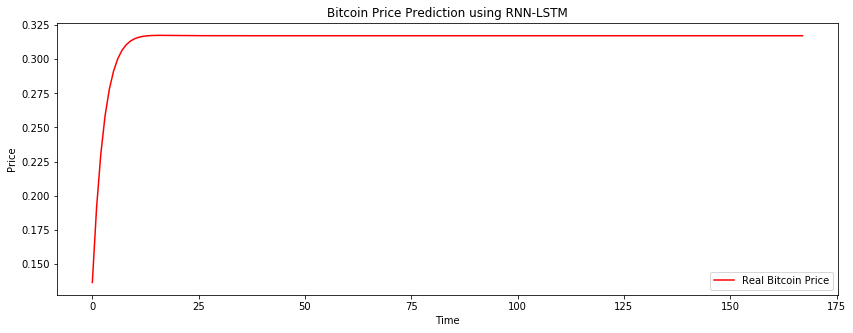

In [55]:
plt.figure(figsize=(14,5))
plt.plot(Y_test[1,:,0], color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred[1,:,0], color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()